In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('winequality-red.csv')

In [3]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [4]:
# first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# statistical measures of the dataset
wine_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


C:\Users\amirh\AppData\Local\Temp\ipykernel_21524\85507392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data = wine_dataset, palette='viridis')


<Axes: xlabel='quality', ylabel='count'>

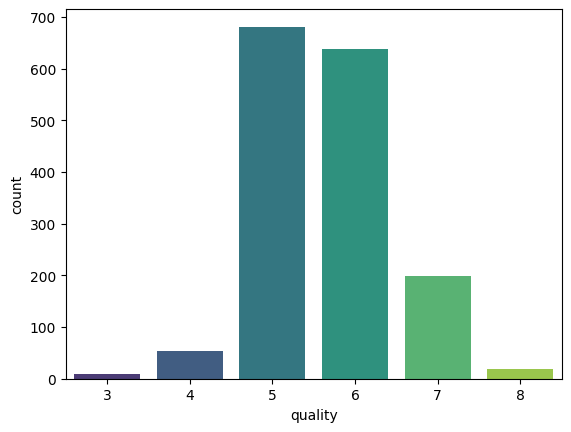

In [7]:
# number of values for each quality
sns.countplot(x='quality', data = wine_dataset, palette='viridis')

C:\Users\amirh\AppData\Local\Temp\ipykernel_21524\3887296255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset, palette='Set2')


<Axes: xlabel='quality', ylabel='volatile acidity'>

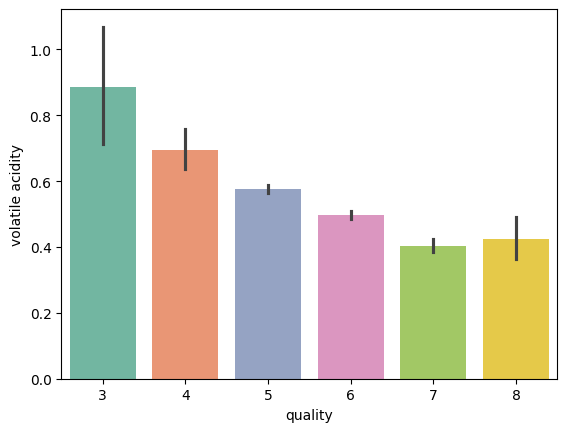

In [8]:
# volatile acidity vs Quality
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset, palette='Set2')

C:\Users\amirh\AppData\Local\Temp\ipykernel_21524\1968877889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'citric acid', data = wine_dataset, palette= "pastel")


<Axes: xlabel='quality', ylabel='citric acid'>

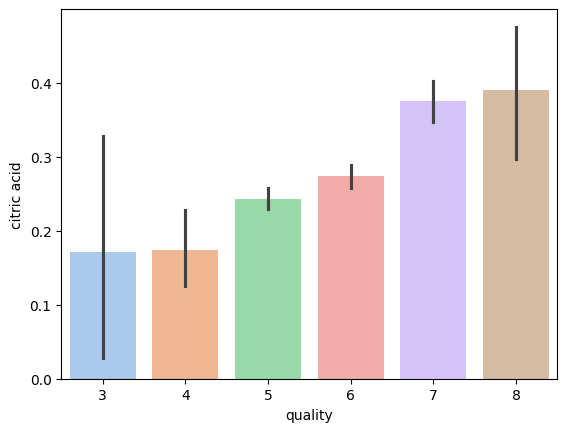

In [9]:
# citric acid vs Quality
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset, palette= "pastel")

In [10]:
correlation = wine_dataset.corr()

<Axes: >

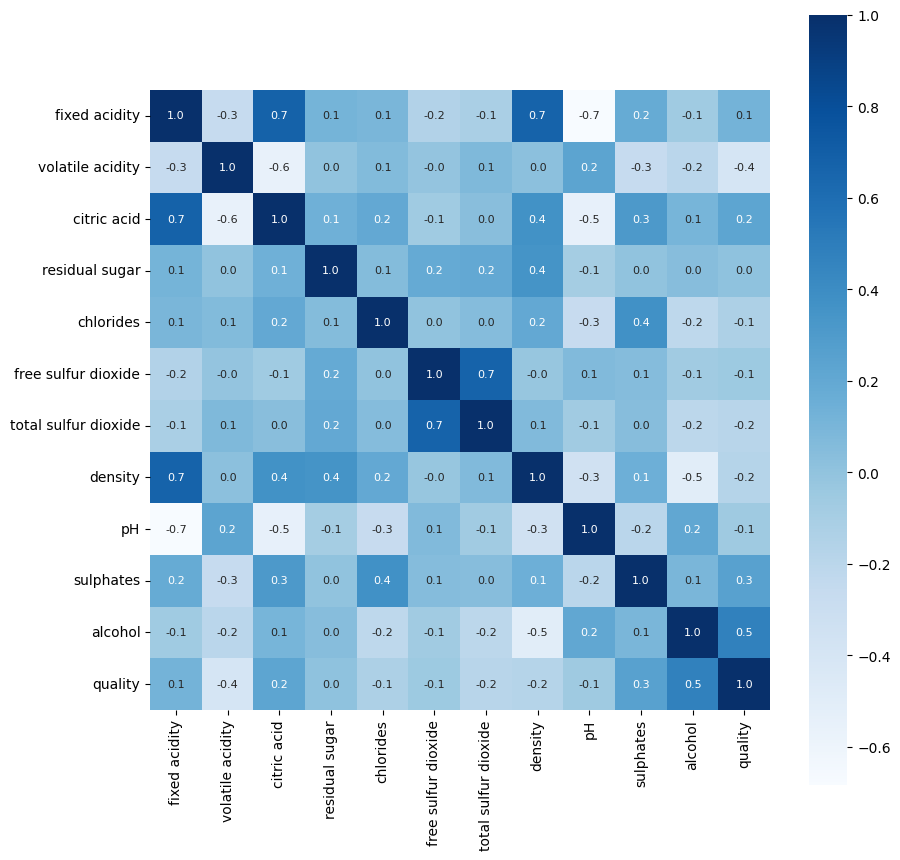

In [11]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [12]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)

In [13]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [14]:
Y = wine_dataset['quality']

In [15]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


Now we will use lambda function to distribute quality in good or bad, if its less than 7 then its bad otherwise its good

In [16]:
Y = Y.apply(lambda y_value: 1 if y_value>=7 else 0)

In [17]:
Y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

Train & Test Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [20]:
model = RandomForestClassifier()

In [21]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [22]:
X_train_prediction = model.predict(X_train)
test_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy : ', test_data_accuracy)

Accuracy :  1.0


In [23]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934375


since accuracy on train data is 1, it is overfitting. hence we use cross validation technique

In [24]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# Perform k-fold cross-validation (e.g., k=5)
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.8828125  0.89453125 0.90234375 0.890625   0.89019608]
Mean accuracy: 0.8921017156862746


In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform k-fold cross-validation (e.g., k=5)
cv_scores = cross_val_score(model, X_train, Y_train, cv=skf, scoring='accuracy')
print("Cross-validation scores using skf :", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores using skf : [0.91015625 0.88671875 0.875      0.87890625 0.87843137]
Mean accuracy: 0.885842524509804


Accuracy slight drop with Stratified K-Fold: This happens because Stratified K-Fold ensures each fold has the same class distribution, which gives a more realistic evaluation of model performance, especially for imbalanced data.


Building a Predictive System

In [26]:
model.fit( X_train, Y_train)


input_data = (7.5,0.5,0.36,6.1,0.171,17.0,302.0,0.0978,1.35,3.8,1.5)
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

feature_names = X_train.columns
input_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

prediction = model.predict(input_df)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
